# Mortality Rate Prediction of the ICD 10 Diagnostic group for the ireland population

## The Dataset : Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease  Dataset- (G0315)

In [1]:
#Importing all the necessary libraries for Data Cleaning,Data Visualization, Data Preparation, Statistical analysis and Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# suppressing the warning messages
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#Import the csv Dataset
colnames = ['Statistic Label', 'Area of Residence', 'ICD 10 Diagnostic Group','Year','UNIT','Mortality Rate(per 1000)']
pop_data = pd.read_csv("G0315.20231020T111006.csv", header=0, names = colnames)

# Early Data  Analysis (EDA)

This process involves:-

a) View the first and last few observations of the pop_data dataset

b) View the number of observations and variables the pop_data dataset has

c) View the entire pop_data dataset to check the data types and any missing data in a particluar variable.

d) Check for any outliers

e) perform summary statistics for categorical and numeric varaibles

In [4]:
#View the pop_data
pop_data

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
0,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2007,No. per 1000 Pop.,1.87
1,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2008,No. per 1000 Pop.,1.90
2,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2009,No. per 1000 Pop.,1.91
3,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2010,No. per 1000 Pop.,1.83
4,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2011,No. per 1000 Pop.,1.94
...,...,...,...,...,...,...
1887,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2013,No. per 1000 Pop.,0.35
1888,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2014,No. per 1000 Pop.,0.39
1889,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2015,No. per 1000 Pop.,0.36
1890,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2016,No. per 1000 Pop.,0.38


In [5]:
#View the pop_data column names, variables data types and missing data points
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1892 non-null   object 
 1   Area of Residence         1892 non-null   object 
 2   ICD 10 Diagnostic Group   1892 non-null   object 
 3   Year                      1892 non-null   int64  
 4   UNIT                      1892 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 88.8+ KB


### Findings
1. The data has some columns that i will not use (statistic label, unit), I will drop them.
2. The variables need to be encoded.
3. The data has missing data points from the mortality rate variable

In [6]:
#View the first 5 observations of the pop_data dataset
pop_data.head()

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
0,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2007,No. per 1000 Pop.,1.87
1,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2008,No. per 1000 Pop.,1.90
2,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2009,No. per 1000 Pop.,1.91
3,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2010,No. per 1000 Pop.,1.83
4,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2011,No. per 1000 Pop.,1.94


In [7]:
#View the last 5 observations of the pop_data dataset
pop_data.tail()

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
1887,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2013,No. per 1000 Pop.,0.35
1888,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2014,No. per 1000 Pop.,0.39
1889,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2015,No. per 1000 Pop.,0.36
1890,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2016,No. per 1000 Pop.,0.38
1891,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2017,No. per 1000 Pop.,NaN


In [8]:
#Check the number of observations and variables the pop_data dataset has
pop_data.shape

(1892, 6)

In [9]:
#Determine the summary statistics for the numerical variables and transpose the values for better visualization
pop_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1892.0,2012.0,3.163114,2007.0,2009.00,2012.00,2015.0,2017.00
Mortality Rate(per 1000),1720.0,1.3,0.776092,0.1,0.57,1.17,2.0,3.92


In [10]:
#Determine the summary statistics for the categorical variables and transpose the values for better readability
pop_data.describe(include = 'object').transpose()

,count,unique,top,freq
Statistic Label,1892,1,Mortality rate attributed to cardiovascular di...,1892
Area of Residence,1892,43,State,44
ICD 10 Diagnostic Group,1892,4,Neoplasms,473
UNIT,1892,1,No. per 1000 Pop.,1892


In [11]:
#summing all the missing data in each variable
pop_data.isnull().sum()

Statistic Label               0
Area of Residence             0
ICD 10 Diagnostic Group       0
Year                          0
UNIT                          0
Mortality Rate(per 1000)    172
dtype: int64

### Findings
The Mortality rate variable has 172 missing data points

In [12]:
#Checking for Duplicates in the pop_data dataset
pop_data.duplicated().sum()

0

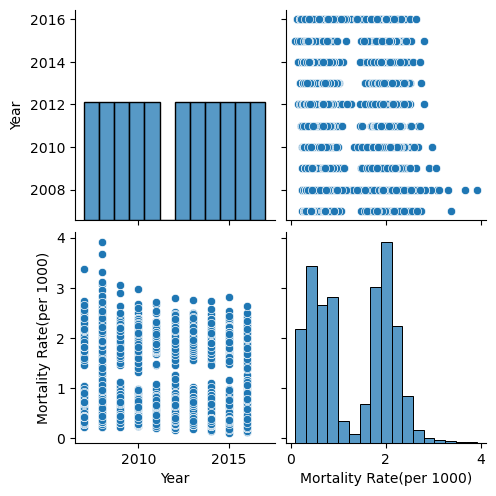

In [13]:
#Visualize the data using seaborn to get an idea of how the pop_data looks like (check for any outliers)
sns.pairplot(pop_data);

<Axes: >

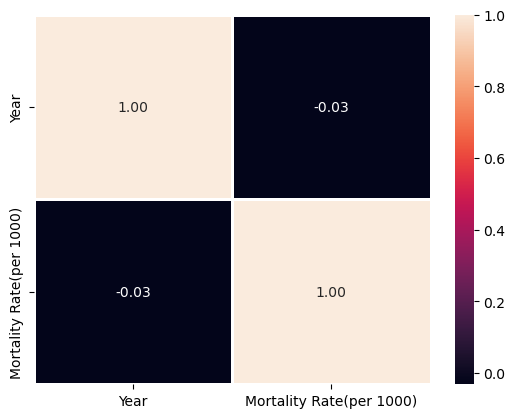

In [14]:
#Plot a Heatmap for the pop_data dataset
import seaborn as sns
sns.heatmap(pop_data.corr(), annot = True, fmt = '.2f', linewidths = 2)

# Data Cleaning Process¶
This process involved the following steps:-

a) Handling Missing Data

b) Handling Duplicates if any

c) Encoding categorical variables

d)Drop the irrelevant row called state

## Handling Missing Data
I Decided to drop the missing mortality rates for the year 2017, because they are missing for the entire year.

In [15]:
#Dropping missing values of the mortality rate for the year 2017. The whole year is missing the mortality rate values
pop_data = pop_data.dropna(axis = 0)

In [16]:
#Checking number of observations in the pop_data dataset after dropping the missing mortality rate observations
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1720 non-null   object 
 1   Area of Residence         1720 non-null   object 
 2   ICD 10 Diagnostic Group   1720 non-null   object 
 3   Year                      1720 non-null   int64  
 4   UNIT                      1720 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.1+ KB


In [17]:
#reset the index of the pop_data dataset after dropping 172 missing observations and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1720 non-null   object 
 1   Area of Residence         1720 non-null   object 
 2   ICD 10 Diagnostic Group   1720 non-null   object 
 3   Year                      1720 non-null   int64  
 4   UNIT                      1720 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 80.8+ KB


In [18]:
#check if there is any missing values after dropping the ones that were missing
pop_data.isnull().values.any()

False

## Handling Variables that will not be used
I dropped variables that i'll not use

In [19]:
#Drop variables that i will not use.
pop_data = pop_data.drop([ 'Statistic Label','UNIT'], axis =1)

In [20]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for each area of residence
pop_data = pop_data[pop_data["Area of Residence"]!= "State"]

In [21]:
#reset the index of the pop_data dataset after dropping 172 missing observations and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1680 non-null   object 
 1   ICD 10 Diagnostic Group   1680 non-null   object 
 2   Year                      1680 non-null   int64  
 3   Mortality Rate(per 1000)  1680 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 52.6+ KB


In [22]:
#View the pop_data dataset after dropping the variables i'll not use
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000)
0,Carlow,Neoplasms,2007,1.91
1,Carlow,Neoplasms,2008,2.02
2,Carlow,Neoplasms,2009,2.17
3,Carlow,Neoplasms,2010,1.72
4,Carlow,Neoplasms,2011,2.33
...,...,...,...,...
1675,South-West,External causes of injury and poisoning,2012,0.41
1676,South-West,External causes of injury and poisoning,2013,0.35
1677,South-West,External causes of injury and poisoning,2014,0.39
1678,South-West,External causes of injury and poisoning,2015,0.36


In [23]:
#View the pop_data dataset shape after dropping some variables and observations
pop_data.shape

(1680, 4)

In [24]:
#View the data type of the variables in the pop_data dataset
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1680 non-null   object 
 1   ICD 10 Diagnostic Group   1680 non-null   object 
 2   Year                      1680 non-null   int64  
 3   Mortality Rate(per 1000)  1680 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 52.6+ KB


# Data Visualization after Data Cleaning

For Data Visualization these are some of the questions i was trying to answer.
1. Which year had the highest mortality rate for each disease?
2. Which area had the highest mortality rate for each disease?
3. What is the mortality trend of each disease over the years?

### 1. Which year had the highest mortality rate for each disease?

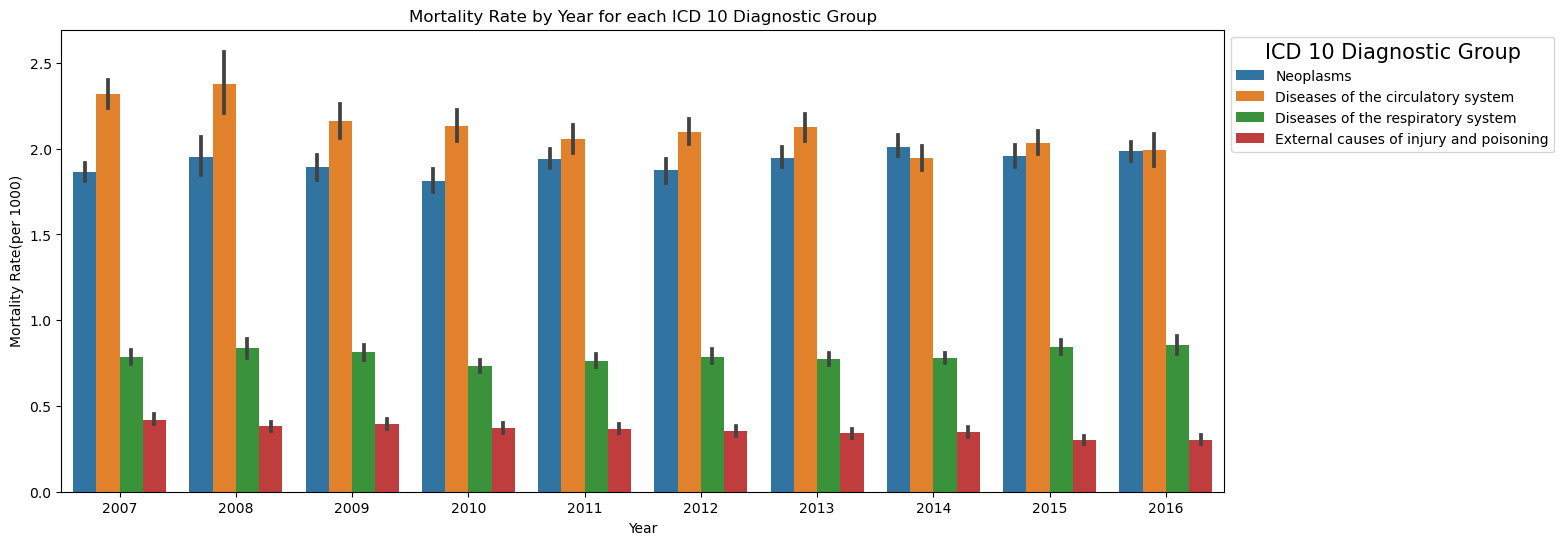

In [25]:
# Visualize the mortality rate of each ICD 10 Diagnostic group for each year using barplots
plt.figure(figsize=(15, 6))
sns.barplot(x="Year", y="Mortality Rate(per 1000)", hue="ICD 10 Diagnostic Group", data=pop_data)
plt.title('Mortality Rate by Year for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 2. What is the mortality trend of each disease over the years?

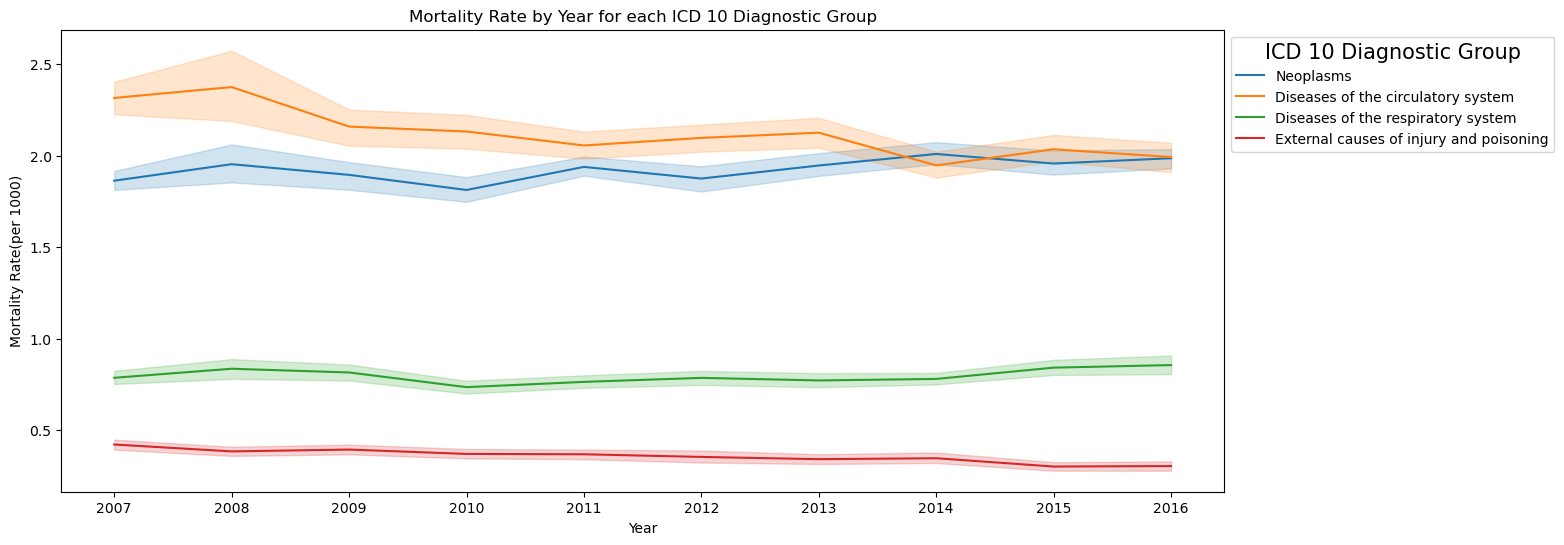

In [26]:
#Visualize the mortality rate trend of each ICD 10 Diagnostic Group over the years using line plots
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="Year", y="Mortality Rate(per 1000)", hue="ICD 10 Diagnostic Group", data=pop_data)
plt.title('Mortality Rate by Year for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks(pop_data['Year'].unique())

plt.show()


### 3. What is the mortality rate for each ICD 10 Diagnostic group by Area of Residence

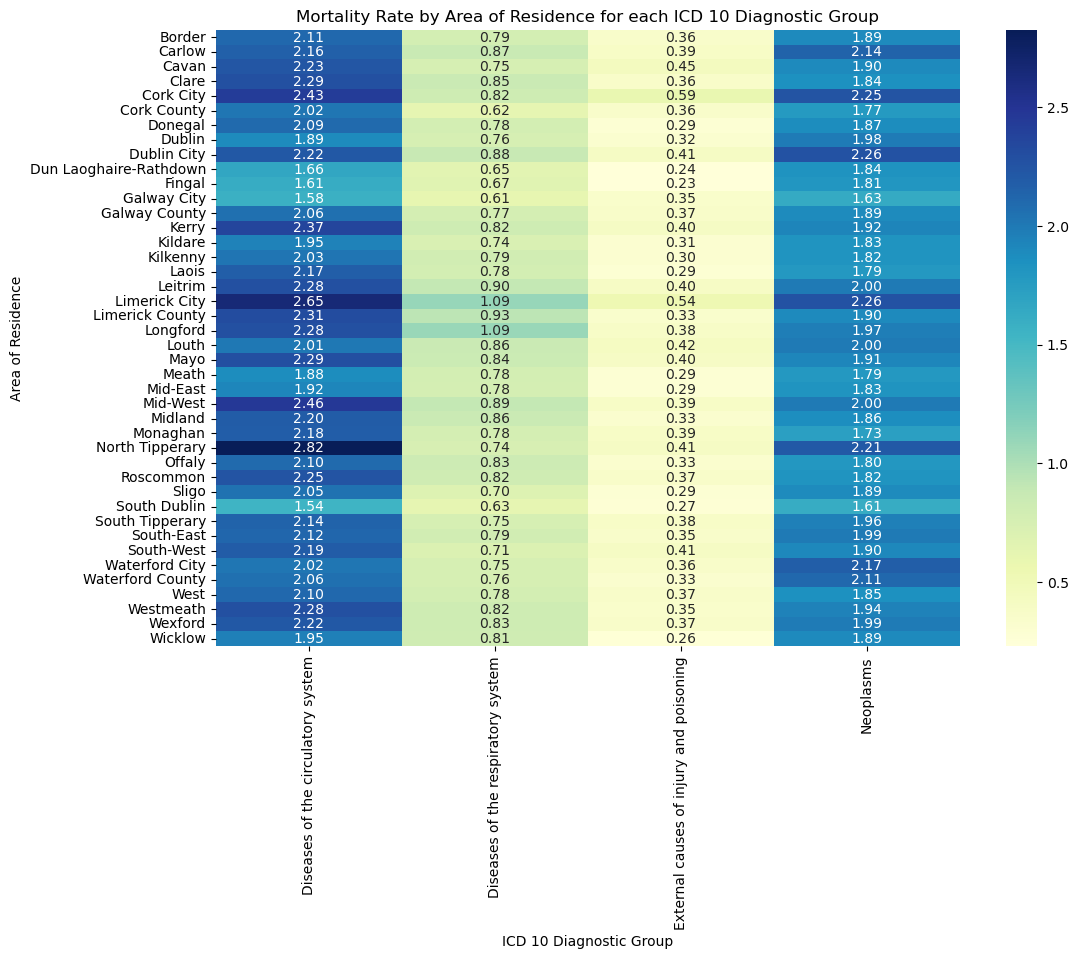

In [27]:
# Visualize the mortality rate of each ICD 10 Diagnostic group for each area of residence using a heatmap
# Create a pivot table for the Area of residence and ICD Diagnostic group
pivot_data = pop_data.pivot_table(index='Area of Residence', columns='ICD 10 Diagnostic Group', values='Mortality Rate(per 1000)')

# Create the heatmap from the pivot_data
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Mortality Rate by Area of Residence for each ICD 10 Diagnostic Group')
plt.show()

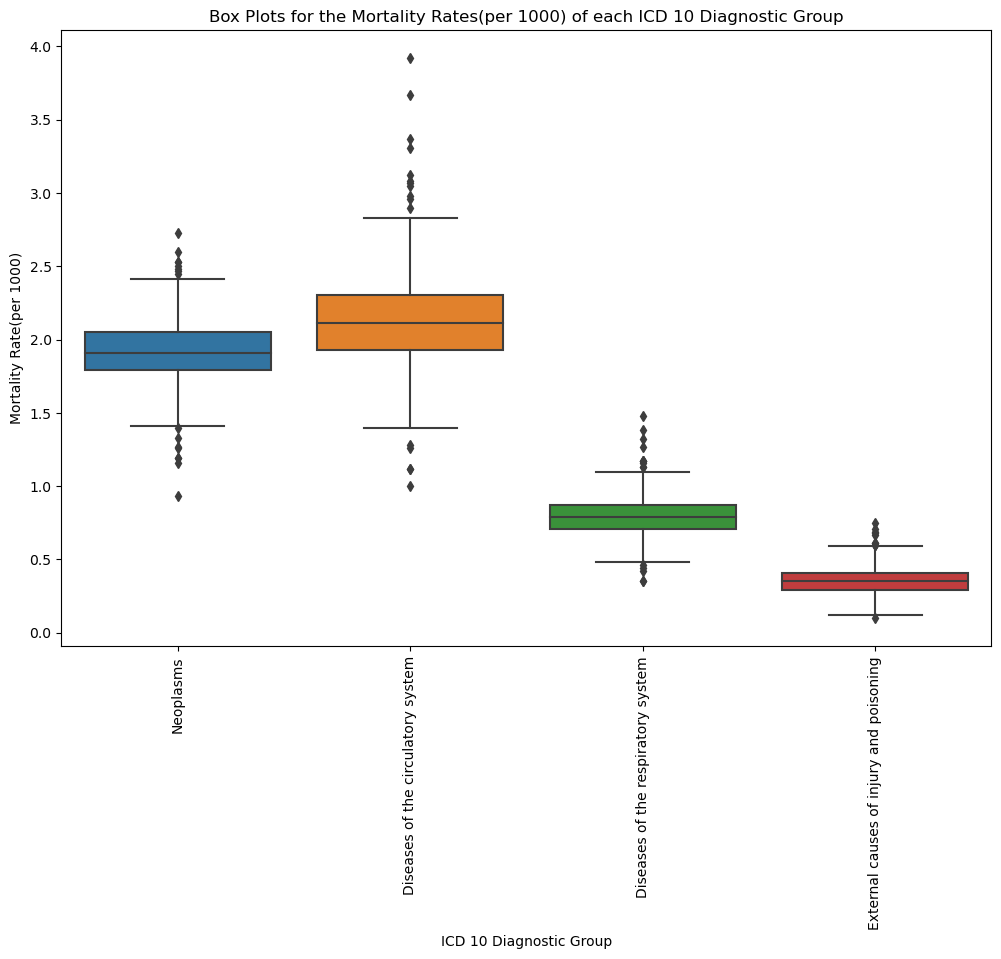

In [28]:
#Visualize the mortality rate of each ICD 10 Diagnostic Group using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='ICD 10 Diagnostic Group', y='Mortality Rate(per 1000)', data=pop_data)
plt.xticks(rotation=90)
plt.xlabel('ICD 10 Diagnostic Group')
plt.ylabel('Mortality Rate(per 1000)')
plt.title('Box Plots for the Mortality Rates(per 1000) of each ICD 10 Diagnostic Group')

plt.show()


### Findings
The four diseases have outliers, with neoplasm having more outliers than the others

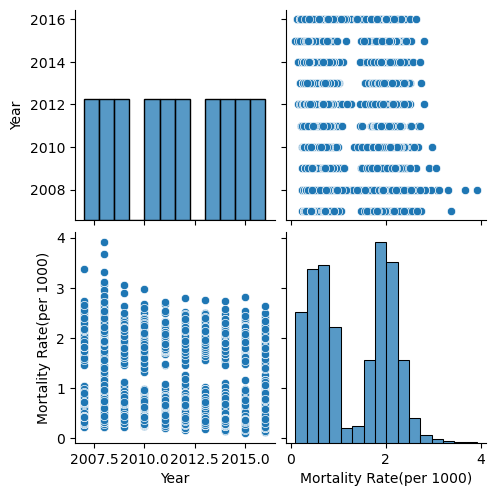

In [29]:
#Visualize the entire pop_data using pairplot
sns.pairplot(pop_data);

<Axes: >

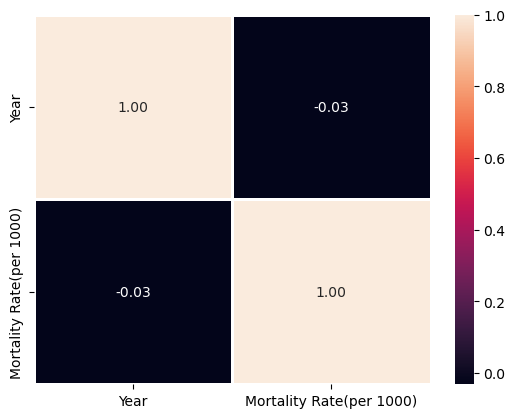

In [30]:
#Visualize the entire pop_data using a Heatmap
sns.heatmap(pop_data.corr(), annot = True, fmt = '.2f', linewidths = 2)

# STATISTICAL ANALYSIS
This process involved:-

a) Determining which data analysis and anaytics i performed (Descriptive, Diagnostic, Predictive, and Prescriptive). 

For this data:-
- I used descriptive analysis and anaytics to understand what happened. 
- I used Predictive analysis and analytics to make prediction of the Mortality rate of each ICD Diagnostic group Variable

b) Assess the levels of data measurements of the variables

c) Calculating the measures of central tendecies and dispersion ( mean, median, IQR ranges, frequency)

d) calculating the measures of dispersion
- coefficient of variation
- variance and standard deviation of grouped data
- check for skewness
- coefficient of skewness
- kurtosis
- coefficient of variation
- box plot

e) Testing various probabilities.(PMF, CDF)

f) Calculate the probability of having a mortality rate of 2.23 if you have neoplasm
- probability distribution of the dataset
- covariance
- correlation coefficient

g) Test the different distributions
- uniform, exponential, normal and stndardized normal (for continous variables)
- poison, hypergeometric, bernoulli, binomial (for discrete variables

h) perform inferential statistics
- Test a hypothesis
- perform a chi-square/ t-test distribution

## Calculating the Measures of Central Tendencies and Measures of Dispersion
1. I deteremined the measures of central tendencies and dispersion (mean, median, variance, SD, Frequency, the quantiles) of mortality rate by various variables

### 1. What are the measures of central tendency and dispersion of mortality rate for each ICD Diagnostic group?

In [31]:
# The measures of central tendency of mortality rate by the ICD 10 Diagnostic Group (code)
diagnostic_mortality = pop_data.groupby('ICD 10 Diagnostic Group')['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

# Rename the columns of each measure of central tendency/dispersion
diagnostic_mortality.columns = ['ICD 10 Diagnostic Group','Frequency', 'Mean', 'Variance', 'Std Deviation','Minimum' ,'Q1', 'Q2 (Median)', 'Q3','Maximum']
diagnostic_mortality

,ICD 10 Diagnostic Group,Frequency,Mean,Variance,Std Deviation,Minimum,Q1,Q2 (Median),Q3,Maximum
0,Diseases of the circulatory system,420,2.124000,0.119228,0.345294,1.00,1.93,2.11,2.3025,3.92
1,Diseases of the respiratory system,420,0.796357,0.020049,0.141593,0.35,0.71,0.79,0.8700,1.48
2,External causes of injury and poisoning,420,0.357333,0.009543,0.097687,0.10,0.29,0.35,0.4100,0.75
3,Neoplasms,420,1.924024,0.053941,0.232251,0.93,1.79,1.91,2.0500,2.73


### 2. What are the measures of central tendency and dispersion for mortality rate for each ICD Diagnostic group for each year?

In [32]:
#Calculate the measures of central tendencies for mortality rates for each ICD 10 Diagnostic group
year_mortality = pop_data.groupby(['Year', 'ICD 10 Diagnostic Group'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

# Rename the columns appropriately
year_mortality.columns = ['Year','ICD 10 Diagnostic Group','Frequency', 'Mean', 'Variance', 'Std Deviation','Minimum' ,'Q1', 'Q2 (Median)', 'Q3','Maximum']
year_mortality

,Year,ICD 10 Diagnostic Group,Frequency,Mean,Variance,Std Deviation,Minimum,Q1,Q2 (Median),Q3,Maximum
0,2007,Diseases of the circulatory system,42,2.316190,0.084829,0.291254,1.68,2.1625,2.310,2.5000,3.37
1,2007,Diseases of the respiratory system,42,0.785476,0.014728,0.121358,0.54,0.7100,0.780,0.8800,1.05
2,2007,External causes of injury and poisoning,42,0.420476,0.009766,0.098821,0.23,0.3350,0.410,0.4700,0.69
3,2007,Neoplasms,42,1.863571,0.029843,0.172751,1.47,1.7525,1.855,1.9450,2.34
4,2008,Diseases of the circulatory system,42,2.375714,0.382025,0.618082,1.00,2.0725,2.430,2.7025,3.92
5,2008,Diseases of the respiratory system,42,0.835000,0.035050,0.187216,0.35,0.7650,0.830,0.9500,1.32
6,2008,External causes of injury and poisoning,42,0.382857,0.007533,0.086793,0.23,0.3300,0.385,0.4200,0.60
7,2008,Neoplasms,42,1.953810,0.129249,0.359512,1.16,1.7550,2.010,2.1500,2.60
8,2009,Diseases of the circulatory system,42,2.159524,0.101010,0.317820,1.12,2.0450,2.155,2.2800,3.05
9,2009,Diseases of the respiratory system,42,0.814524,0.022274,0.149245,0.35,0.7250,0.835,0.8975,1.13


### Plot the mean mortality rate by year for each ICD 10 Diagnostic group

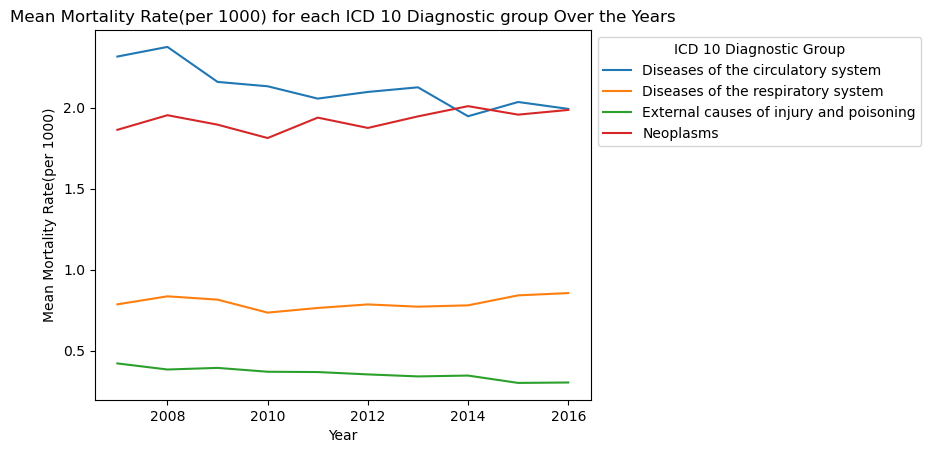

In [33]:
# Group the year_mortality data by ICD 10 diagnostic group and obtain the mean mortality rate for each diagnostic group over the years
diagnosis_data = year_mortality.groupby('ICD 10 Diagnostic Group')

# Iterate through each ICD 10 diagnostic group and create a line chart
for diagnosis, group_data in diagnosis_data:
    plt.plot(group_data['Year'], group_data['Mean'], label=diagnosis)
plt.xlabel('Year')
plt.ylabel('Mean Mortality Rate(per 1000)')
plt.title('Mean Mortality Rate(per 1000) for each ICD 10 Diagnostic group Over the Years')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


### 3. What are the measures of central tendency and dispersion for the mortality rate for each ICD Diagnostic group over the years?

In [37]:
# A list of the ICD 10 Diagnostic group
diseases = ['Diseases of the circulatory system	', 'Neoplasms', 'External causes of injury and poisoning', 'Diseases of the respiratory system']

#Create a data frame called disease_measure
disease_measures = pd.DataFrame()

#select each disease in the disease list using a for loop
for disease in diseases:
    filtered_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]
    
    # Calculate the measures of central tendency/dispersion of the 'Mortality Rate'
    measures = filtered_data.groupby(['Year'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Q2_Median=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    maximum='max').reset_index()


   
    #concantenate the disease measures to the measures dataframe
    measures['ICD 10 Diagnostic Group'] = disease
    disease_measures = pd.concat([disease_measures, measures])

#View the disease dataframe
disease_measures

,Year,Frequency,mean,variance,SD,minimum,Q1,Q2_Median,Q3,maximum,ICD 10 Diagnostic Group
0,2007,42,1.863571,0.029843,0.172751,1.47,1.7525,1.855,1.9450,2.34,Neoplasms
1,2008,42,1.953810,0.129249,0.359512,1.16,1.7550,2.010,2.1500,2.60,Neoplasms
2,2009,42,1.895476,0.058952,0.242801,0.93,1.7775,1.920,2.0375,2.32,Neoplasms
3,2010,42,1.812857,0.049889,0.223359,1.33,1.6900,1.785,1.9350,2.40,Neoplasms
4,2011,42,1.939048,0.033282,0.182434,1.68,1.8200,1.885,2.0350,2.50,Neoplasms
5,2012,42,1.875238,0.055650,0.235902,1.19,1.7800,1.885,2.0050,2.45,Neoplasms
6,2013,42,1.946667,0.041476,0.203658,1.57,1.8000,1.940,2.0575,2.40,Neoplasms
7,2014,42,2.009762,0.041593,0.203943,1.69,1.8800,1.970,2.0675,2.73,Neoplasms
8,2015,42,1.957381,0.045503,0.213314,1.55,1.8200,1.930,2.0425,2.53,Neoplasms
9,2016,42,1.986429,0.031809,0.178350,1.59,1.8800,2.005,2.0875,2.41,Neoplasms


### 4. What are the measures of central tendency and dispersion for the mortality rate for each ICD Diagnostic group by area of residence?

In [38]:
#The measures of central tendency and dispersion of the mortality rate by Area of residence(code)
area_measures = pop_data.groupby(['Area of Residence'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Q2_Median=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    maximum='max').reset_index()
area_measures

,Area of Residence,Frequency,mean,variance,SD,minimum,Q1,Q2_Median,Q3,maximum
0,Border,40,1.28800,0.562063,0.749708,0.29,0.6225,1.370,1.9625,2.49
1,Carlow,40,1.38925,0.662581,0.813991,0.28,0.7050,1.370,2.1175,2.90
2,Cavan,40,1.33250,0.599855,0.774503,0.29,0.6000,1.265,2.0525,2.54
3,Clare,40,1.33600,0.618881,0.786690,0.30,0.6200,1.345,2.0650,2.51
4,Cork City,40,1.52475,0.720338,0.848728,0.44,0.7350,1.490,2.2950,3.08
5,Cork County,40,1.19475,0.529379,0.727585,0.31,0.4650,1.195,1.8800,2.20
6,Donegal,40,1.26000,0.588251,0.766975,0.24,0.5750,1.390,1.9675,2.44
7,Dublin,40,1.23750,0.535604,0.731850,0.19,0.6250,1.260,1.9450,2.16
8,Dublin City,40,1.44300,0.696904,0.834808,0.25,0.7025,1.490,2.2325,2.63
9,Dun Laoghaire-Rathdown,40,1.09650,0.478890,0.692019,0.10,0.5325,1.150,1.7425,2.11


## Coefficient of Variation 

In [39]:
# Calculate the coefficient of variation (CV) of mortality rate for each ICD 10 diagnostic group using the year_mortality data
year_mortality['Coefficient of Variation'] = (year_mortality['Std Deviation'] / year_mortality['Mean']) * 100

# Group the year_mortality data by ICD 10 Diagnostic group
diagnosis_data = year_mortality.groupby('ICD 10 Diagnostic Group')

# Iterate through each ICD 10 diagnostic group
for diagnosis, group_data in diagnosis_data:
    cv = group_data['Coefficient of Variation'].iloc[0]
    print(f'Diagnosis: {diagnosis}, Coefficient of Variation: {cv:.2f}%')


Diagnosis: Diseases of the circulatory system, Coefficient of Variation: 12.57%
Diagnosis: Diseases of the respiratory system, Coefficient of Variation: 15.45%
Diagnosis: External causes of injury and poisoning, Coefficient of Variation: 23.50%
Diagnosis: Neoplasms, Coefficient of Variation: 9.27%


## A Density Distribution for Mortality rate against the ICD 10 Diagnostic group 

Text(0.5, 0, 'Mortality Rate(per 1000)')

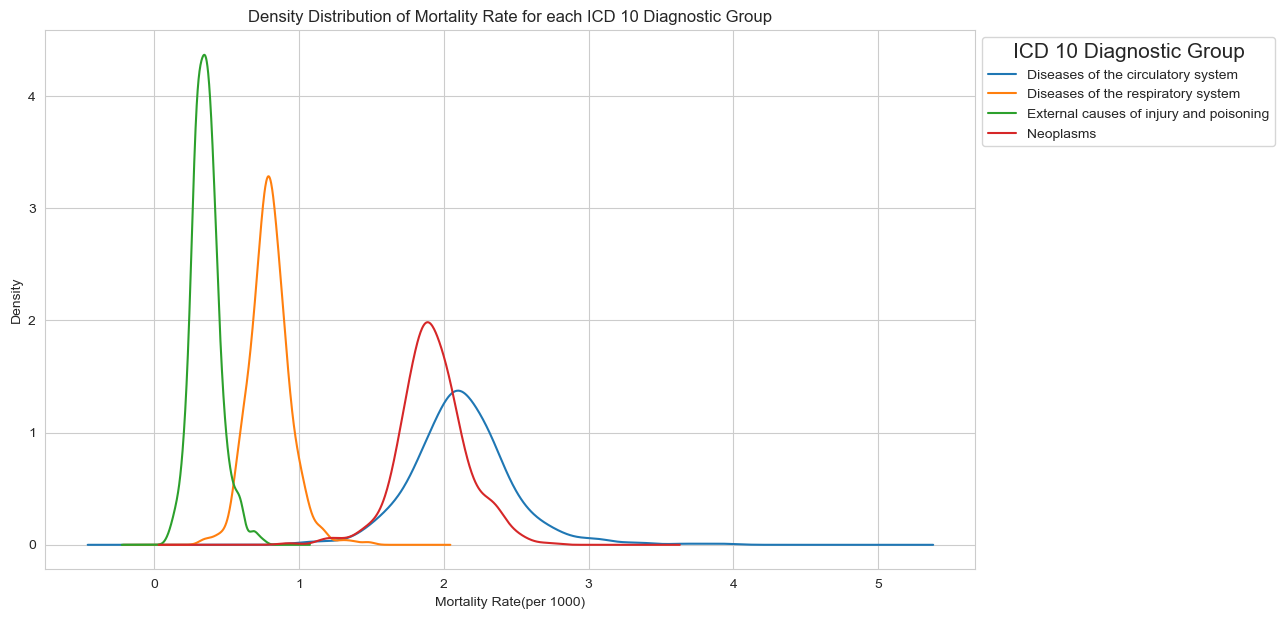

In [40]:
# Sort the pop_data by year and ICD 10 Diagnostic Group in ascending order
pop_data_sorted = pop_data.sort_values(by=['Year','ICD 10 Diagnostic Group'])

# Plot distribution of Mortality Rate(per 1000) by ICD 10 Diagnostic Group
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
pop_data_sorted.groupby('ICD 10 Diagnostic Group')['Mortality Rate(per 1000)'].plot(kind='kde')
plt.title('Density Distribution of Mortality Rate for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Mortality Rate(per 1000)') 

## Histogram for Mortality Rates of Each ICD Diagnostic group

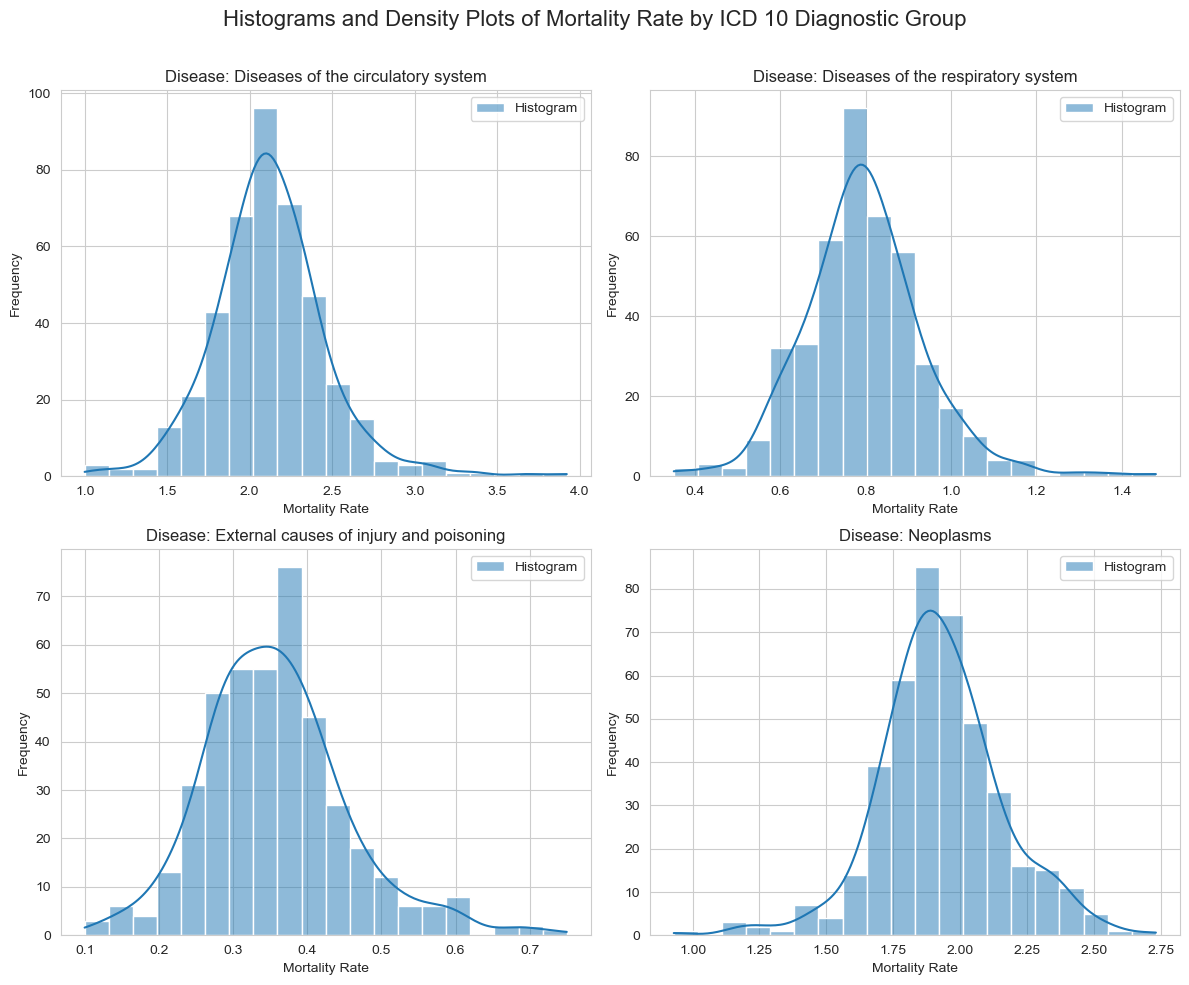

In [41]:
# Group the pop_data by ICD 10 Diagnostic Group
grouped_data = pop_data_sorted.groupby('ICD 10 Diagnostic Group')

# Create a figure with subplots for the ICD 10 Diagnostic group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms and Density Plots of Mortality Rate by ICD 10 Diagnostic Group', fontsize=16)

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Plot histograms and density plots for each disease
for i, (diagnosis, group_data) in enumerate(grouped_data):
    ax = axes[i]

    # Plot the histogram
    sns.histplot(group_data['Mortality Rate(per 1000)'], bins=20, ax=ax, kde=True, label='Histogram')
    ax.set_title(f'Disease: {diagnosis}')
    ax.set_xlabel('Mortality Rate')
    ax.set_ylabel('Frequency')
    ax.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## Skewness and Kurtosis

In [42]:
#Import functions that calculate skewness and kurtosis 
from scipy.stats import skew, kurtosis

# Group pop_data by ICD 10 Diagnostic Group
grouped_data = pop_data.groupby('ICD 10 Diagnostic Group')

# Initialize the lists that will store skewness and kurtosis values
skewness_values = []
kurtosis_values = []

# Calculate the skewness and kurtosis for each ICD 10 Diagnostic group
for diagnosis, group_data in grouped_data:
    skewness = skew(group_data['Mortality Rate(per 1000)'], bias=False)
    kurt = kurtosis(group_data['Mortality Rate(per 1000)'], bias=False)
    skewness_values.append((diagnosis, skewness))
    kurtosis_values.append((diagnosis, kurt))

# Create DataFrames to store the results
skewness_data = pd.DataFrame(skewness_values, columns=['ICD 10 Diagnostic Group', 'Skewness'])
kurtosis_data = pd.DataFrame(kurtosis_values, columns=['ICD 10 Diagnostic Group', 'Kurtosis'])

# Print or further analyze the skewness and kurtosis for each disease
print("Skewness:")
print(skewness_data)

print("\nKurtosis:")
print(kurtosis_data)

Skewness:
                   ICD 10 Diagnostic Group  Skewness
0       Diseases of the circulatory system  0.711394
1       Diseases of the respiratory system  0.583666
2  External causes of injury and poisoning  0.685116
3                                Neoplasms -0.088348

Kurtosis:
                   ICD 10 Diagnostic Group  Kurtosis
0       Diseases of the circulatory system  3.264256
1       Diseases of the respiratory system  2.393766
2  External causes of injury and poisoning  1.361227
3                                Neoplasms  1.563361


# Probability Mass Function
I plotted PMF curves for the dicrete variables

## Encode the Categories for PMF

In [43]:
pop_data["ICD 10 Diagnostic Group"] = pop_data["ICD 10 Diagnostic Group"].astype("category")
pop_data["Area of Residence"] = pop_data["Area of Residence"].astype("category")

# Assign category codes
pop_data["ICD 10 Diagnostic Group coded"] = pop_data["ICD 10 Diagnostic Group"].cat.codes
pop_data["Area of Residence coded"] = pop_data["Area of Residence"].cat.codes

In [44]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Area of Residence              1680 non-null   category
 1   ICD 10 Diagnostic Group        1680 non-null   category
 2   Year                           1680 non-null   int64   
 3   Mortality Rate(per 1000)       1680 non-null   float64 
 4   ICD 10 Diagnostic Group coded  1680 non-null   int8    
 5   Area of Residence coded        1680 non-null   int8    
dtypes: category(2), float64(1), int64(1), int8(2)
memory usage: 34.5 KB


### PMF of ICD Diagnostic Group

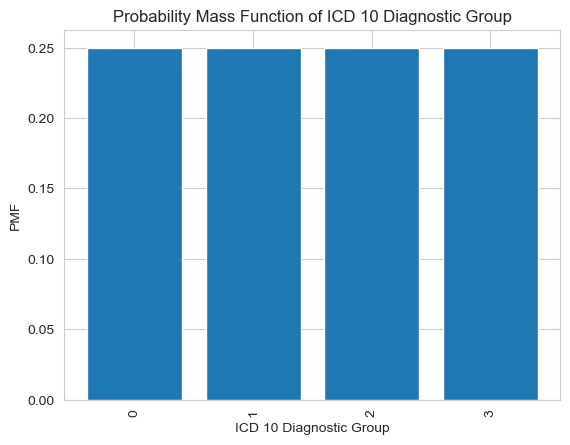

In [45]:
#Import the library for PMF
from empiricaldist import Pmf

# Create a PMF from the ICD 10 Diagnostic Group Variable
pmf = Pmf.from_seq(pop_data['ICD 10 Diagnostic Group coded'])

# Create a bar plot for the PMF
pmf.bar()

x_ticks = range(int(pmf.qs.min()), int(pmf.qs.max()) + 1)
plt.xticks(x_ticks, rotation=90)
plt.xticks(rotation=90)
plt.xlabel('ICD 10 Diagnostic Group')
plt.ylabel('PMF')
plt.title('Probability Mass Function of ICD 10 Diagnostic Group')
plt.show()


### PMF for Area of Residence

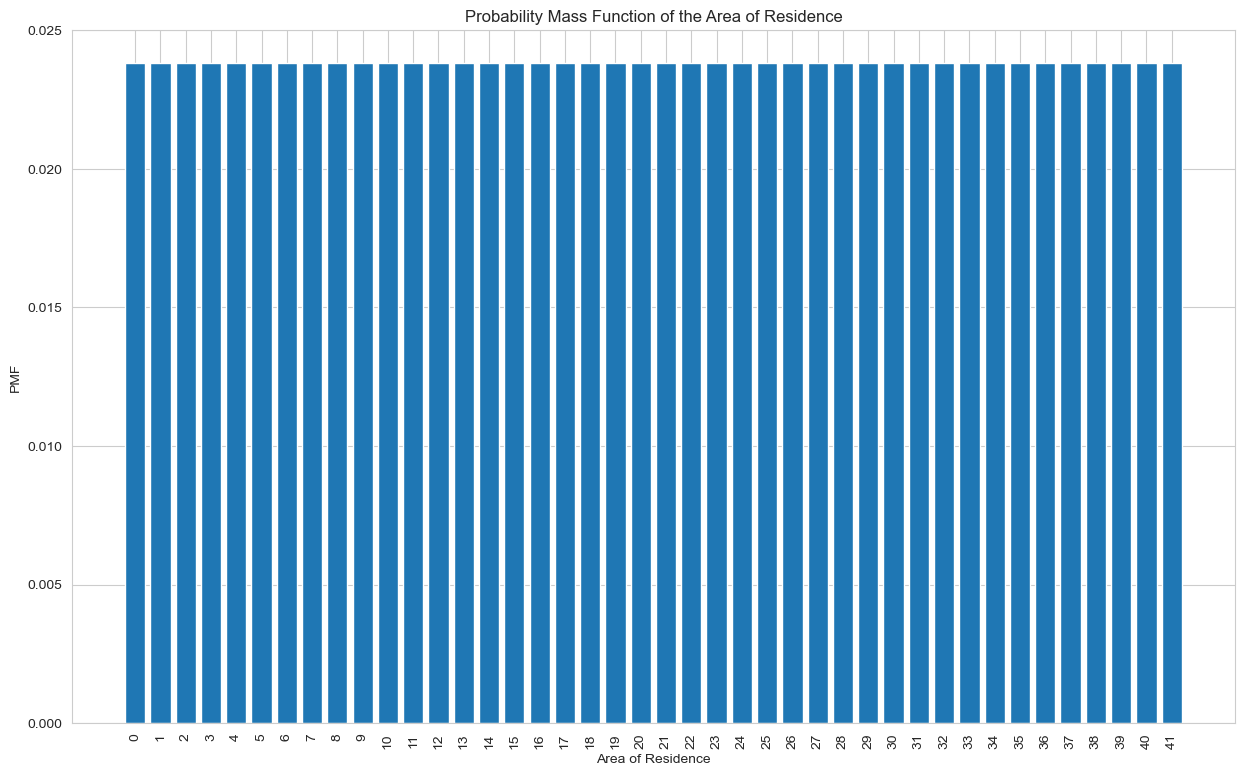

In [46]:
#Import the library for PMF
from empiricaldist import Pmf

# Create a PMF from the Area of Residence Group Variable
pmf = Pmf.from_seq(pop_data['Area of Residence coded'])

plt.figure(figsize=(15, 9))
# Create a bar plot for the PMF
pmf.bar()
x_ticks = pmf.qs
plt.xticks(x_ticks, rotation=90)
plt.xlabel('Area of Residence')
plt.ylabel('PMF')
plt.title('Probability Mass Function of the Area of Residence')
plt.show()


In [47]:
#Drop the new variables i created for PMF
pop_data = pop_data.drop(['Area of Residence coded','ICD 10 Diagnostic Group coded'], axis=1)

# Cummulative Density Function

### CDF for Mortality rate variable for each ICD Diagnostic Group

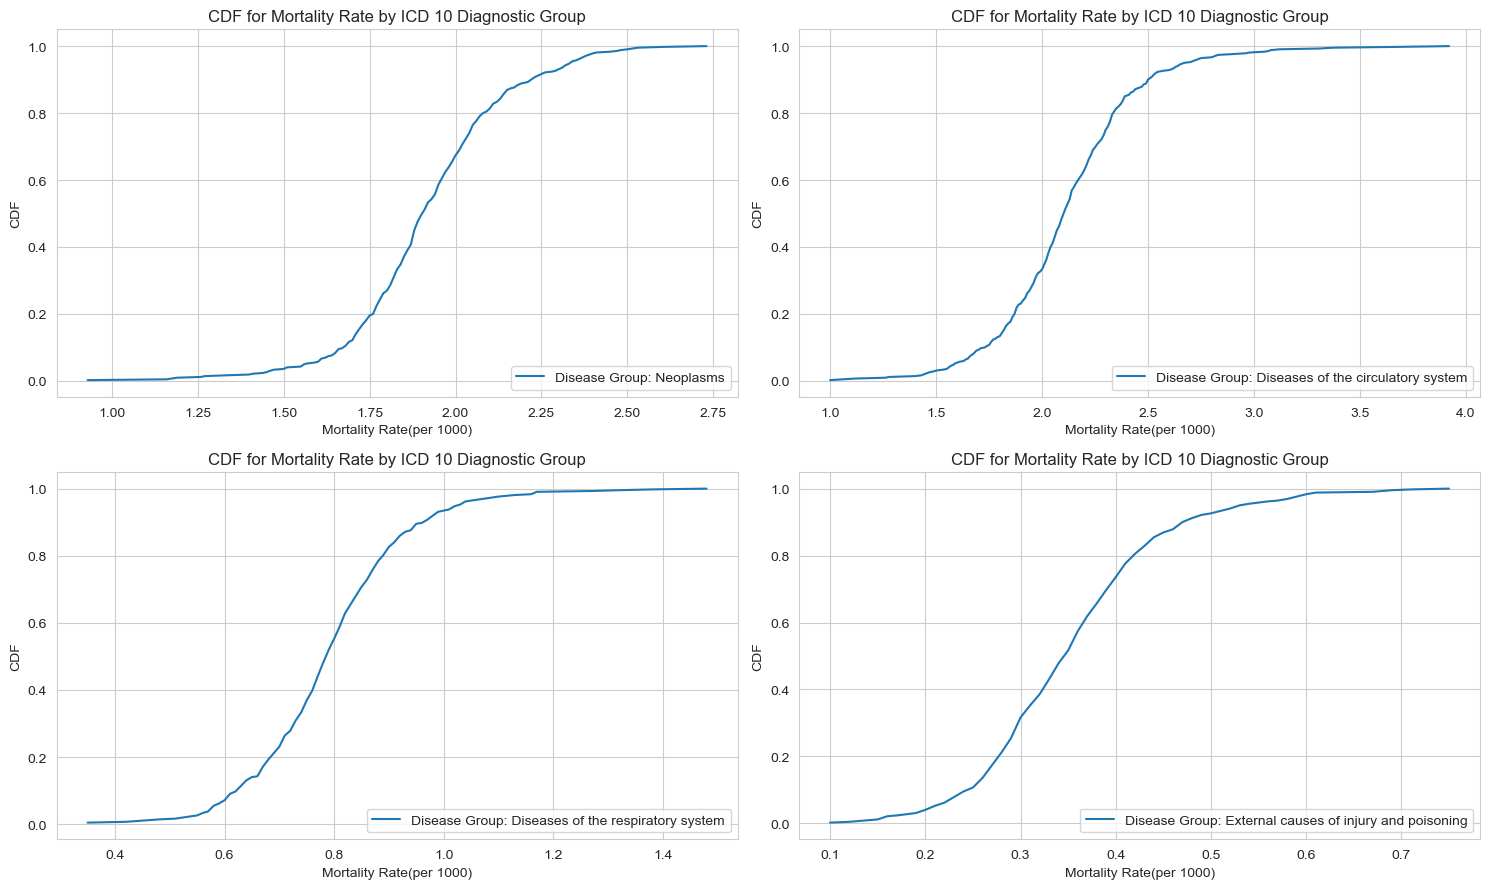

In [48]:
#Import the CDF library
from empiricaldist import Cdf

#Create a dataframe for the unique diseases in the ICD Diagnostic group in pop_data
disease_groups = pop_data['ICD 10 Diagnostic Group'].unique()

#Plot the CDF curves for each ICD Diagnostic Group (disease) mortality rates
plt.figure(figsize=(15, 9))
for i, disease_group in enumerate(disease_groups):
    plt.subplot(2, 2, i + 1) 
    data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease_group]['Mortality Rate(per 1000)']
    cdf = Cdf.from_seq(data)
    cdf.plot(label=f'Disease Group: {disease_group}')
    plt.xlabel('Mortality Rate(per 1000)')
    plt.ylabel('CDF')
    title_text = f'CDF for Mortality Rate by ICD 10 Diagnostic Group'
    plt.title(title_text)
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### CDF for year for each ICD 10 Diagnostic group

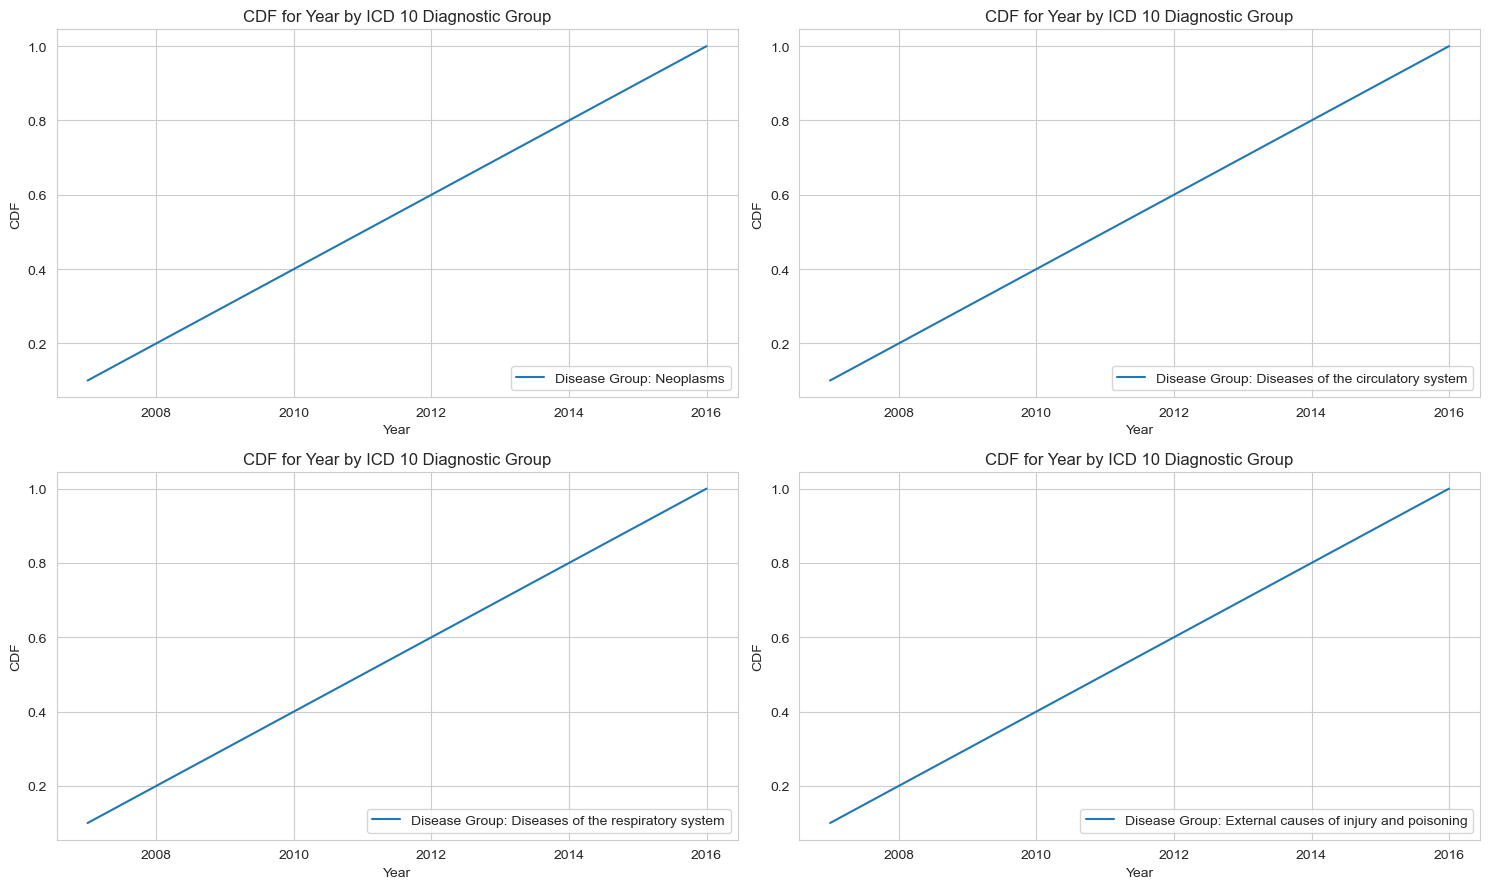

In [49]:
#Import the CDF library
from empiricaldist import Cdf

#Create a dataframe for the unique diseases in the ICD Diagnostic group in pop_data
disease_groups = pop_data['ICD 10 Diagnostic Group'].unique()

#Plot the CDF curves for each ICD Diagnostic Group (disease) by year
plt.figure(figsize=(15, 9))
for i, disease_group in enumerate(disease_groups):
    plt.subplot(2, 2, i + 1) 
    data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease_group]['Year']
    cdf = Cdf.from_seq(data)
    cdf.plot(label=f'Disease Group: {disease_group}')
    plt.xlabel('Year')
    plt.ylabel('CDF')
    title_text = f'CDF for Year by ICD 10 Diagnostic Group'
    plt.title(title_text)
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Normality Test of the Variables
There are various normality tests one can perform to determine if a variable is normally distributed. These include:-
- Plotting histograms/Q-Q plots/normal probability plots
- calculating using statistical techniques such as Perform a Shapiro-Wilk Test, If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.
- Perform a Kolmogorov-Smirnov Test, If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

### Normality test using Q-Q Plots

### Q-Q Plots for Mortality rate for each ICD Diagnostic group

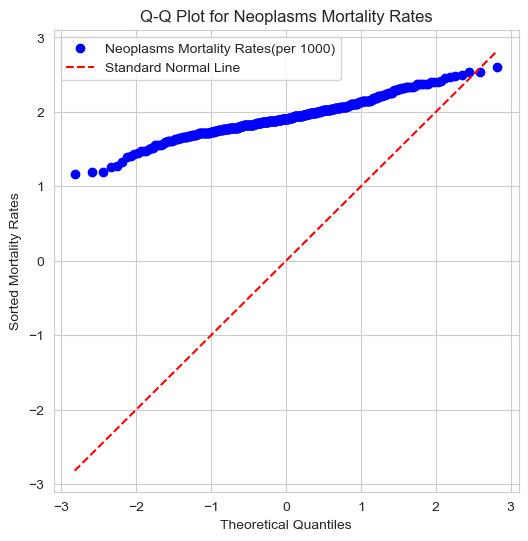

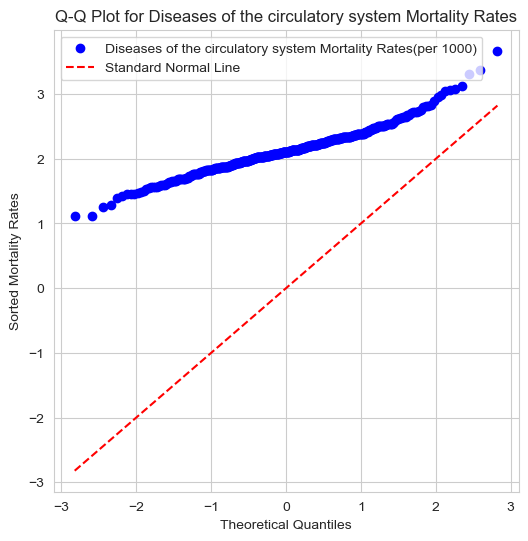

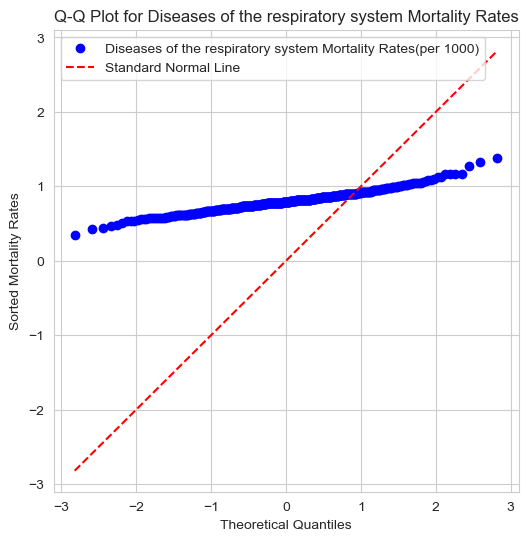

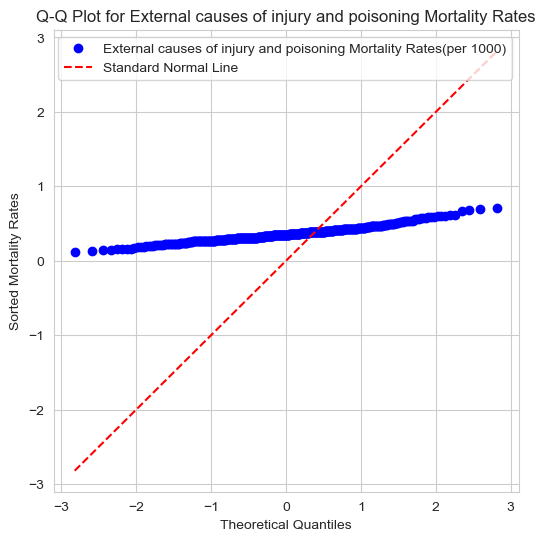

In [50]:
import scipy.stats as stats
#Make the ICD Diagnostic group a list of unique diseases
unique_diseases = pop_data['ICD 10 Diagnostic Group'].unique()

# Create a Q-Q plot for each disease
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Mortality Rate(per 1000)']
    
    # Sort the mortality rates
    sorted_mortality_rates = np.sort(disease_data)
    
    # Generate theoretical quantiles for a standard normal distribution
    theoretical_quantiles = stats.norm.ppf(np.linspace(0, 1, len(sorted_mortality_rates)))
    
    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, sorted_mortality_rates, c='b', marker='o', label=f'{disease} Mortality Rates(per 1000)')
    
    # Add the standard normal line in the plot
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label='Standard Normal Line')
    
    #Labelling the plots
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sorted Mortality Rates')
    plt.title(f'Q-Q Plot for {disease} Mortality Rates')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


### Q-Q Plots for Year for each ICD Diagnostic group

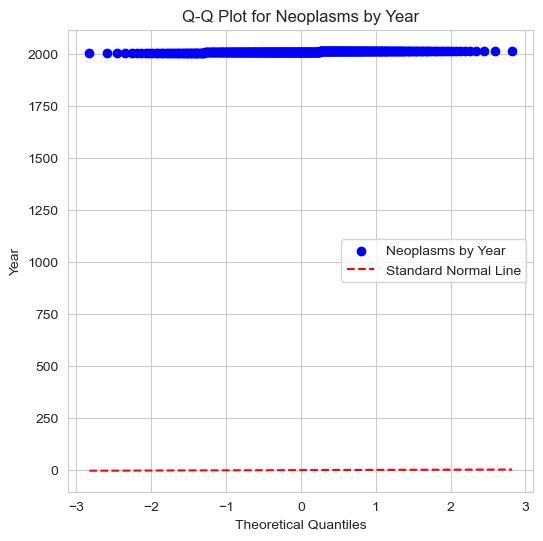

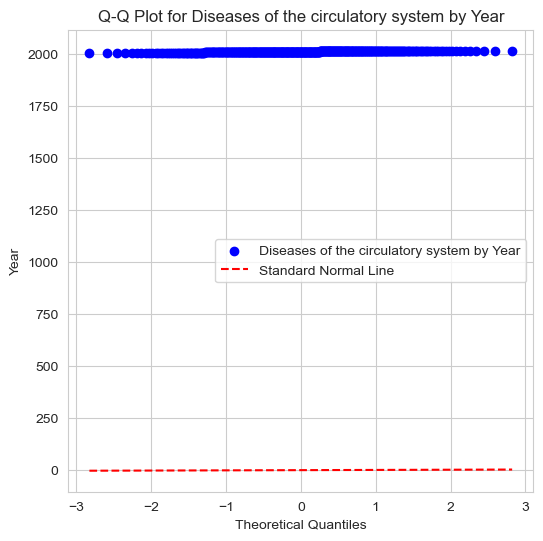

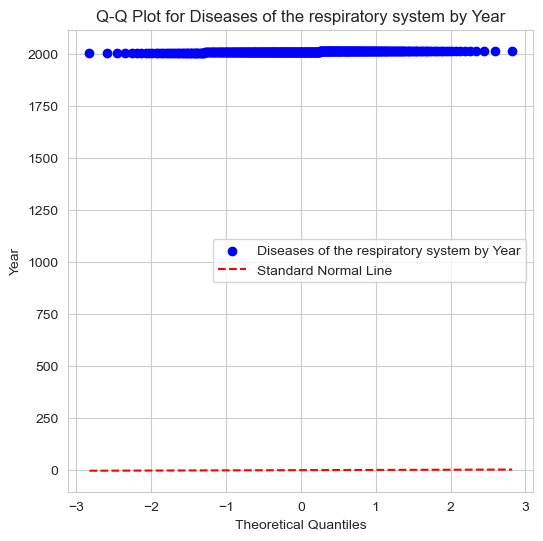

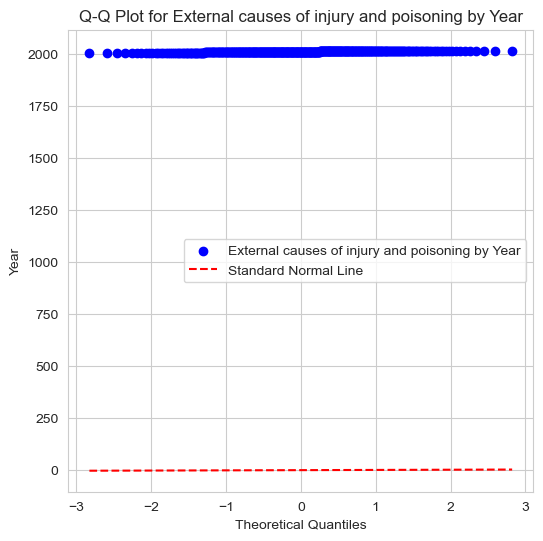

In [51]:
import scipy.stats as stats
#Make the ICD Diagnostic group a list of unique diseases
unique_diseases = pop_data['ICD 10 Diagnostic Group'].unique()

# Create a Q-Q plot for each disease
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Year']
    
    # Sort the Year
    sorted_year = np.sort(disease_data)
    
    # Generate theoretical quantiles for a standard normal distribution
    theoretical_quantiles = stats.norm.ppf(np.linspace(0, 1, len(sorted_year)))
    
    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, sorted_year, c='b', marker='o', label=f'{disease} by Year')
    
    # Add the standard normal line in the plot
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label='Standard Normal Line')
    
    
    #Labelling the plots
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Year')
    plt.title(f'Q-Q Plot for {disease} by Year')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

### Normality Test using Shapiro-wilk Test

In [52]:
#Shapiro-wilk test for the Mortality Rate(per 1000)
#Import the shapiro function
from scipy.stats import shapiro 
shapiro(pop_data['Mortality Rate(per 1000)'])

ShapiroResult(statistic=0.9001912474632263, pvalue=9.728883779538246e-32)

### Shapiro-wilk test for mortality rate for each ICD Diagnostic Group
Set the hypothesis to test:

H0: The Mortality rate variable for each disease does not follow a normal distribution

H1: The mortality rate variable for each disease follows a normal distribution

In [53]:
# Perform Shapiro-Wilk test for mortality rate each ICD Diagnostic Group
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Mortality Rate(per 1000)']
    
    # Perform Shapiro-Wilk test for the current disease group
    stat, p_value = shapiro(disease_data)
    
    # Print the results
    print(f'Disease: {disease}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    
    # add a significance level threshold and then intepret the results
    if p_value < 0.05:
        print("The Mortality rate variable follow a normal distribution (reject H0)")
    else:
        print("The Mortality rate variable does not follows a normal distribution (fail to reject H0)")
    
    print('\n')


Disease: Neoplasms
Shapiro-Wilk Statistic: 0.9784623384475708
p-value: 6.837703949713614e-06
The Mortality rate variable follow a normal distribution (reject H0)


Disease: Diseases of the circulatory system
Shapiro-Wilk Statistic: 0.9577519297599792
p-value: 1.294024221110135e-09
The Mortality rate variable follow a normal distribution (reject H0)


Disease: Diseases of the respiratory system
Shapiro-Wilk Statistic: 0.9696428179740906
p-value: 1.1858939075182207e-07
The Mortality rate variable follow a normal distribution (reject H0)


Disease: External causes of injury and poisoning
Shapiro-Wilk Statistic: 0.9702915549278259
p-value: 1.560118221277662e-07
The Mortality rate variable follow a normal distribution (reject H0)




### Shapiro-wilk test for Year for each ICD Diagnostic Group
Set the hypothesis to test:

H0: The Year variable for each disease does not follow a normal distribution

H1: The Year variable for each disease follows a normal distribution

In [54]:
# Perform Shapiro-Wilk test for each ICD Diagnostic Group
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Year']
    
    # Perform Shapiro-Wilk test for the current disease group
    stat, p_value = shapiro(disease_data)
    
    # Print the results
    print(f'Disease: {disease}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    
    # add a significance level threshold and then intepret the results
    if p_value < 0.05:
        print("The Year variable follow a normal distribution (reject H0)")
    else:
        print("The Year variable does not follows a normal distribution (fail to reject H0)")
    
    print('\n')


Disease: Neoplasms
Shapiro-Wilk Statistic: 0.9351323843002319
p-value: 1.4929019392234677e-12
The Year variable follow a normal distribution (reject H0)


Disease: Diseases of the circulatory system
Shapiro-Wilk Statistic: 0.9351323843002319
p-value: 1.4929019392234677e-12
The Year variable follow a normal distribution (reject H0)


Disease: Diseases of the respiratory system
Shapiro-Wilk Statistic: 0.9351323843002319
p-value: 1.4929019392234677e-12
The Year variable follow a normal distribution (reject H0)


Disease: External causes of injury and poisoning
Shapiro-Wilk Statistic: 0.9351323843002319
p-value: 1.4929019392234677e-12
The Year variable follow a normal distribution (reject H0)




# Correlation between the Features

In [55]:
correlation = pop_data.corr()
print(correlation)

                              Year  Mortality Rate(per 1000)
Year                      1.000000                 -0.031637
Mortality Rate(per 1000) -0.031637                  1.000000


<Axes: >

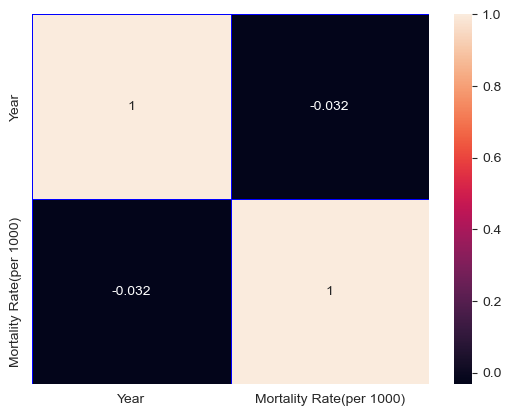

In [56]:
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

## Uniform Distribution

## Poison Distribution

## Hypergeometric Distribution

# Inferential Statistics

hypothesis testing
z and T test

y vs all independent variables

# MACHINE LEARNING
This process involves:
- Encoding the categorical Variables
- Creating the features and dependent variable objects
- Standardising the data
- splitting the data into training and Test set.
- build various ML models
- test the model on a test data set
- Evaluate the model performance
- Maximize the model performance
- Hyperparameter tuning

## Encoding the Features
I used one-hot encoding for the categorical variables, Area of Residence and ICD 10 Diagnostic group. 

one hot encoding does not order the labels

In [57]:
#Encoding the ICD 10 Diagnostic Group Variable
# Import the OneHotEncoder function
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Creating the one-hot-encoder object
Diagnosis_OneHotEncoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the ICD Diagnosis Group
encoder_diagnosis = Diagnosis_OneHotEncoder.fit_transform(pop_data[['ICD 10 Diagnostic Group']])

# Convert the one-hot encoded result to a DataFrame
encoder_diagnosis_df = pd.DataFrame(encoder_diagnosis, columns=Diagnosis_OneHotEncoder.get_feature_names_out(['ICD 10 Diagnostic Group']))

# Merge the encoder_diagnosis_df with the pop_data 
pop_data = pd.concat([pop_data, encoder_diagnosis_df], axis=1)

# View the pop_data to check if the two data frames have been merged
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000),ICD 10 Diagnostic Group_Diseases of the circulatory system,ICD 10 Diagnostic Group_Diseases of the respiratory system,ICD 10 Diagnostic Group_External causes of injury and poisoning,ICD 10 Diagnostic Group_Neoplasms
0,Carlow,Neoplasms,2007,1.91,0.0,0.0,0.0,1.0
1,Carlow,Neoplasms,2008,2.02,0.0,0.0,0.0,1.0
2,Carlow,Neoplasms,2009,2.17,0.0,0.0,0.0,1.0
3,Carlow,Neoplasms,2010,1.72,0.0,0.0,0.0,1.0
4,Carlow,Neoplasms,2011,2.33,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1675,South-West,External causes of injury and poisoning,2012,0.41,0.0,0.0,1.0,0.0
1676,South-West,External causes of injury and poisoning,2013,0.35,0.0,0.0,1.0,0.0
1677,South-West,External causes of injury and poisoning,2014,0.39,0.0,0.0,1.0,0.0
1678,South-West,External causes of injury and poisoning,2015,0.36,0.0,0.0,1.0,0.0


In [58]:
#Encoding the Area of Residence Variable
# Creating the one-hot-encoder object
area_OneHotEncoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the ICD Diagnosis Group
encoder_area = area_OneHotEncoder.fit_transform(pop_data[['Area of Residence']])

# Convert the encoder_area to a DataFrame
encoder_area_df = pd.DataFrame(encoder_area, columns=area_OneHotEncoder.get_feature_names_out(['Area of Residence']))

# Merge the encoder_area_df with the pop_data 
pop_data = pd.concat([pop_data, encoder_area_df], axis=1)

# View the pop_data to check if the two data frames have been merged
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000),ICD 10 Diagnostic Group_Diseases of the circulatory system,ICD 10 Diagnostic Group_Diseases of the respiratory system,ICD 10 Diagnostic Group_External causes of injury and poisoning,ICD 10 Diagnostic Group_Neoplasms,Area of Residence_Border,Area of Residence_Carlow,...,Area of Residence_South Dublin,Area of Residence_South Tipperary,Area of Residence_South-East,Area of Residence_South-West,Area of Residence_Waterford City,Area of Residence_Waterford County,Area of Residence_West,Area of Residence_Westmeath,Area of Residence_Wexford,Area of Residence_Wicklow
0,Carlow,Neoplasms,2007,1.91,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Carlow,Neoplasms,2008,2.02,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Carlow,Neoplasms,2009,2.17,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Carlow,Neoplasms,2010,1.72,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Carlow,Neoplasms,2011,2.33,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,South-West,External causes of injury and poisoning,2012,0.41,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,South-West,External causes of injury and poisoning,2013,0.35,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,South-West,External causes of injury and poisoning,2014,0.39,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,South-West,External causes of injury and poisoning,2015,0.36,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#View the data to view the new one hot encoded variables
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 50 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   Area of Residence                                                1680 non-null   category
 1   ICD 10 Diagnostic Group                                          1680 non-null   category
 2   Year                                                             1680 non-null   int64   
 3   Mortality Rate(per 1000)                                         1680 non-null   float64 
 4   ICD 10 Diagnostic Group_Diseases of the circulatory system       1680 non-null   float64 
 5   ICD 10 Diagnostic Group_Diseases of the respiratory system       1680 non-null   float64 
 6   ICD 10 Diagnostic Group_External causes of injury and poisoning  1680 non-null   float64 
 7   ICD 10 Diagnostic Group_Neoplasms

In [60]:
#Drop Variables that i'll not use
pop_data = pop_data.drop(["Area of Residence", "ICD 10 Diagnostic Group"], axis = 1)


In [61]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 48 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             1680 non-null   int64  
 1   Mortality Rate(per 1000)                                         1680 non-null   float64
 2   ICD 10 Diagnostic Group_Diseases of the circulatory system       1680 non-null   float64
 3   ICD 10 Diagnostic Group_Diseases of the respiratory system       1680 non-null   float64
 4   ICD 10 Diagnostic Group_External causes of injury and poisoning  1680 non-null   float64
 5   ICD 10 Diagnostic Group_Neoplasms                                1680 non-null   float64
 6   Area of Residence_Border                                         1680 non-null   float64
 7   Area of Residence_Carlow                  

# Try all possible supervised machine learning models because the target variable is continous.
- KNN
- Decision trees regression (CART)
- Random forest
- Linear regression
- Lasso regression
- Ridge regression
- Support Vector regression
- Gaussian Naive Bayes

## Linear Regression
Steps followed:-
- Import all necessary libraries
- Train the model (finding the loss function and the parameter that minimizes loss)
- Grid Search

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

In [63]:
#The dependent and independent variables
y = pop_data.iloc[:, 1].values
X = pop_data.drop('Mortality Rate(per 1000)', axis=1).values

In [64]:
print(X)

[[2007.    0.    0. ...    0.    0.    0.]
 [2008.    0.    0. ...    0.    0.    0.]
 [2009.    0.    0. ...    0.    0.    0.]
 ...
 [2014.    0.    0. ...    0.    0.    0.]
 [2015.    0.    0. ...    0.    0.    0.]
 [2016.    0.    0. ...    0.    0.    0.]]


In [65]:
print(y)

[1.91 2.02 2.17 ... 0.39 0.36 0.38]


In [66]:
X.shape, y.shape

((1680, 47), (1680,))

In [67]:
# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 47)
(504, 47)
(1176,)
(504,)


## Linear Regression Model

R-squared of the model in training set is: 0.939167706901745
-----Test set statistics-----
R-squared of the model in test set is: 0.946732626055388
Root mean squared error of the prediction is: 0.1767296352297046
Mean absolute percentage error of the prediction is: 12.836405966541278
MSE train: 0.037, test: 0.031
R^2 train: 0.939, test: 0.947


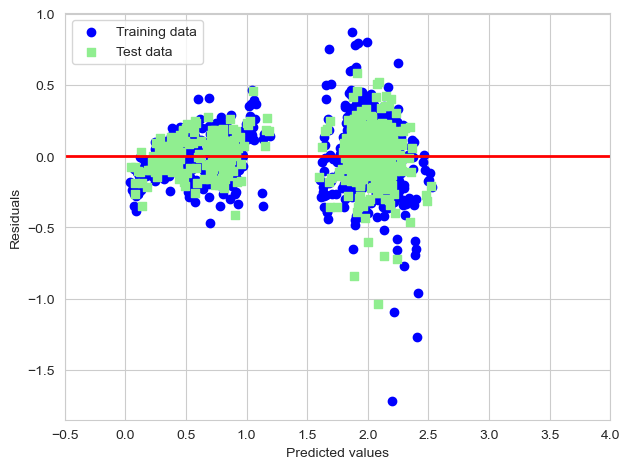

In [69]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Fitting the OLS model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in training set is: {}".format(slr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(slr.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100))

# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -0.5, xmax = 4, lw = 2, color = 'red')
plt.xlim([-0.5, 4])
plt.tight_layout()

plt.show()



## Fitting a robust regression model using RANSAC

In [70]:
#Fitting a robust regression model using RANSAC
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling an object RANSACRegressor()
ransac = RANSACRegressor(slr, 
                         max_trials = 100, 
                         min_samples = 50,                          
                         residual_threshold = 5.0, 
                         random_state = 0)
ransac.fit(X, y)

# Display the coefficients and intercepts
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: -0.009
Intercept: 18.508


## Decision Tree Regression

In [71]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Initialise an object by calling a method DecisionTreeRegressor()
decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)  # You can adjust max_depth as needed

#Pass the training set through the decision_Regressor
decision_Regressor.fit(X_train, y_train)

#Predict the X_test values
y_pred_decision=decision_Regressor.predict(X_test)

from statsmodels.tools.eval_measures import mse, rmse
print("R-squared of the model in training set is: {}".format(decision_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_Regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_decision)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_decision) / y_test)) * 100))

R-squared of the model in training set is: 0.9025768906274586
-----Test set statistics-----
R-squared of the model in test set is: 0.9223141278294589
Root mean squared error of the prediction is: 0.2134271969517706
Mean absolute percentage error of the prediction is: 14.478177276304418


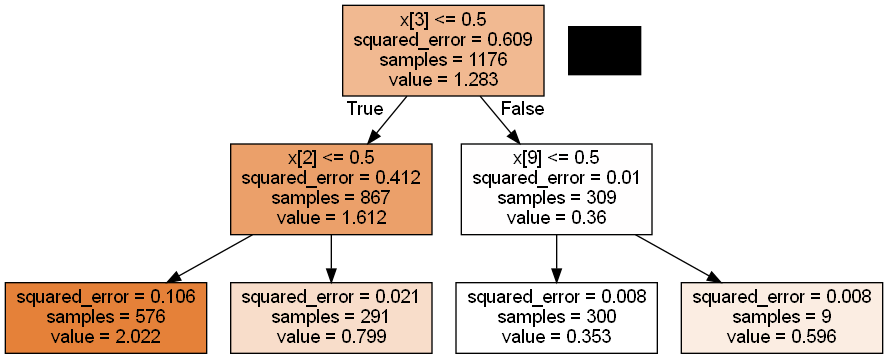

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

# Create a StringIO object to hold the visualization
dot_data = StringIO()

# Export the Decision Tree as a Graphviz dot file
export_graphviz(decision_Regressor, out_file=dot_data, filled=True)

# Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create an Image from the graph
Image(graph.create_png())

# Random Forest Regression

In [73]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest_Regressor = RandomForestRegressor(n_estimators = 1000,random_state=0)

# Train the Model by calling a fit() method
forest_Regressor.fit(X_train, y_train)

#Predict the Test Set
y_pred_random = forest_Regressor.predict(X_test)

#Print the R^2, mse, mean absolute percebtage error
print("R-squared of the model in training set is: {}".format(forest_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_Regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_random) / y_test)) * 100))

R-squared of the model in training set is: 0.9927462988393774
-----Test set statistics-----
R-squared of the model in test set is: 0.9504571824943991
Root mean squared error of the prediction is: 0.17043904351866027
Mean absolute percentage error of the prediction is: 10.71386436385514


# Ridge Regression

In [74]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.95
Training set score: 0.94
Test set score: 0.95
Training set score: 0.94
Test set score: 0.95


## using GridSearch for parameter optimization in Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

# Making predictions here
y_train_pred = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_test_pred_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_pred_ridge) / y_test)) * 100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
R-squared of the model in training set is: 0.9391272598118254
-----Test set statistics-----
R-squared of the model in test set is: 0.9468438236162544
Root mean squared error of the prediction is: 0.17654507412177242
Mean absolute percentage error of the prediction is: 12.686422948163214


# Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.00
Test set score: -0.01
Number of features used: 0
Training set score: 0.91
Test set score: 0.92
Number of features used: 5
Training set score: 0.94
Test set score: 0.95
Number of features used: 43


## Using GridSearch Parameter optimization in Lasso Regression

In [78]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
R-squared of the model in training set is: 0.9102156182711396
-----Test set statistics-----
R-squared of the model in test set is: 0.9230224722133329
Root mean squared error of the prediction is: 0.21245194785452737
Mean absolute percentage error of the prediction is: 15.733822962349176


# ElasticNet

In [79]:
# Load library for the ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)

e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean_square_error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

print(e_net.coef_, e_net.intercept_)

Mean Squared Error on test set 0.5897813492063492
[-0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0.
  0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0.  0.
 -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.] 1.2828571428571427


## support vector Machine

In [80]:
from sklearn.svm import SVR
svr= SVR()

#fit the svr 
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.12057852518936474

In [81]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.824 total time=   2.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   2.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.853 total time=   2.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=   1.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.951 total time=   1.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.952 total time=   1.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.932 total time=   1.5s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.949 total time=   1.6s
[CV 5/5] END ....C=1000, gam

0.9559643933948435

## KNN

In [83]:
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5)
knn_Regressor.fit(X_train, y_train)
knn_score = knn_Regressor.score(X_test, y_test)
print("R-squared score on the test data:", knn_score)

R-squared score on the test data: 0.9137020390251515
